In [2]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

In [3]:
Univ = pd.read_csv("Universities.csv")

In [4]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [5]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [7]:
kmeans_clust=KMeans(n_clusters=3)
kmeans_clust.fit(df_norm)
kmeans_clust.labels_


array([1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2,
       2, 0, 1])

In [8]:
Univ["Cluster_id"]=pd.Series(kmeans_clust.labels_)
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster_id
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,1
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,2


In [9]:
result=Univ.iloc[:,1:].groupby(Univ.Cluster_id).mean()
result

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster_id
Cluster_id,,,,,,,
0,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.75,0
1,1353.181818,89.090909,24.090909,10.181818,38618.727273,92.00,1
2,1253.000000,77.700000,43.500000,12.900000,22008.200000,86.90,2


In [10]:
Univ.loc[Univ.Cluster_id==1]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster_id
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,1
3,Columbia,1310,76,24,12,31510,88,1
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,1
10,MIT,1380,94,30,10,34870,91,1
14,Princeton,1375,91,14,8,30220,95,1
16,Stanford,1360,90,20,12,36450,93,1


In [12]:
k=list(range(2,8))
k
TWSS=[]#variable for storing total within sum of squares for each kmeans
for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    WSS=[]#variable for storing within sum of squares for each cluster
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
      
TWSS


[array([9.18208121]),
 array([7.85923615]),
 array([6.85069476]),
 array([6.06433592]),
 array([5.54464278]),
 array([5.02197857])]

([<matplotlib.axis.XTick at 0x2a75ad24a90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

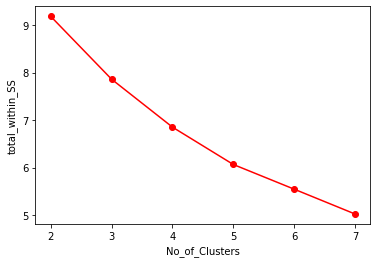

In [13]:
plt.plot(k,TWSS,'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)